In [1]:
#hide
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
import xgboost as xgb



plt.style.use('default')

%matplotlib inline

## Multiple feats no hists, 1 tree

In [7]:
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)
y = y + rng.normal(0, 0.3, size=len(y))

z = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

f_0 = np.mean(z["y"])

z["g"] = 2*(z["y"]-f_0)*z["y"]
z["h"] = -2*z["y"]

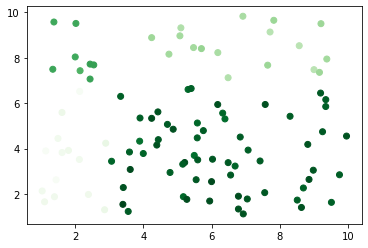

In [8]:
plt.scatter(z["X1"],z["X2"], c=z["y"],cmap='Greens')

In [9]:
x_1 = z.drop(["X2","y"], axis = 1)
x_2 = z.drop(["X1","y"], axis = 1)

hist = [x_1,x_2]
feature = list(z.columns)

del feature[len(feature) - 2:]

tree = split(hist,feature,0,2)

print(tree)

tree = find_leaf_weights(z,tree)

{'feature': 'X2', 'threshold': 7.061383387778343, 'left': {'feature': 'X1', 'threshold': 3.0650084598608647, 'left': {'prediction': -0.28558754827408817}, 'right': {'prediction': 1.928857033434019}}, 'right': {'feature': 'X1', 'threshold': 3.0650084598608647, 'left': {'prediction': -2.403172159804428}, 'right': {'prediction': -0.1887275780963209}}}


In [127]:
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)

y = y + rng.normal(0, 0.3, size=len(y))

test = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

preds = 0

preds = test.apply(predict, axis='columns', rules=rule.copy())
preds = preds + np.mean(test["y"])

    

np.sqrt(np.sum(np.power(preds-test["y"],2))/len(preds))


0.3317910288177003

## Multiple feats hists, 1 tree 

In [27]:
################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)

y = y + rng.normal(0, 0.3, size=len(y))

df = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

f_0 = np.mean(df["y"])

#Compute gradient and hessian of each sample
df["g"] = 2*(df["y"]-f_0)/len(df["y"])
df["h"] = -2/len(df["y"])

################## Creating histograms ###################

hists = []

feature = list(df.columns)
del feature[len(feature) - 3:]

print(feature)

b = 50

for i in feature:
    df_bin = df[[i,"g","h"]].copy()
    
    df_bin["bin"] = pd.qcut(df_bin[i],b)

    df_bin = df_bin.groupby('bin', as_index=False)[['g','h']].sum()
    df_bin[i] = df_bin["bin"].apply(lambda x :x.mid)

    df_bin.drop("bin",axis = 1, inplace = True)

    df_bin = df_bin[[i,"g","h"]]
    hists.append(df_bin)
    
    
################## Training the trees ###################
    
tree_hist = split(hists,feature,0,2)

print(tree)

tree_hist = find_leaf_weights(df,tree_hist)

['X1', 'X2']
{'feature': 'X2', 'threshold': 7.061383387778343, 'left': {'feature': 'X1', 'threshold': 3.0650084598608647, 'left': {'prediction': -6.556150262782654}, 'right': {'prediction': 2.530552286661546}}, 'right': {'feature': 'X1', 'threshold': 3.0650084598608647, 'left': {'prediction': -0.4391863006553455}, 'right': {'prediction': -3.4000279972127463}}}


In [28]:
################## Creating test data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)

y = y + rng.normal(0, 0.3, size=len(y))

test = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})


################## Predicting using model ###################
preds = 0
preds = test.apply(predict, axis='columns', rules=tree_hist.copy())
preds = preds + np.mean(test["y"])

    
################## Calculate RMSE ###################
np.sqrt(np.sum(np.power(preds-test["y"],2))/len(preds))


1.6081697890633

## Multiple feat hist XGBoost 

In [35]:
%%time

################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)

y = y + rng.normal(0, 0.3, size=len(y))

df = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})


################## Model 0 ###################
f_0 = np.mean(df["y"])

f_m = f_0

trees = []

################## Other models ###################
for t in range(1,10):
    
    
    #Compute gradient and hessian of each sample
    df["g"] = 2*(df["y"]-f_m)/len(df["y"])
    df["h"] = -2/len(df["y"])
    
    hists = []

    feature = list(df.columns)
    del feature[len(feature) - 3:]
    b = 40

    for i in feature:
        df_bin = df[[i,"g","h"]].copy()
        df_bin["bin"] = pd.qcut(df_bin[i],b)

        df_bin = df_bin.groupby('bin', as_index=False)[['g','h']].sum()
        df_bin[i] = df_bin["bin"].apply(lambda x :x.mid)

        df_bin.drop("bin",axis = 1, inplace = True)

        df_bin = df_bin[[i,"g","h"]]
        hists.append(df_bin)


    ######## Training the trees #######

    tree_hist = split(hists,feature,0,2)

    treeko = find_leaf_weights(df,tree_hist)

    trees.append(treeko)
    
    #Predict the residuals 
    preds = df.apply(predict, axis='columns', rules=treeko.copy())

    f_m = f_m + preds

    
    



Wall time: 2.41 s


In [42]:
################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,100):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []
for i in range(len(x_1)):
    if x_1[i]<3:
        if x_2[i] < 7:
            y.append(3)
        else : 
            y.append(9)
    else:
        if x_2[i] < 7:
            y.append(12)
        else : 
            y.append(6)

y = y + rng.normal(0, 0.3, size=len(y))

test = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

preds = 0
for i in range(len(trees)):
    preds += test.apply(predict, axis='columns', rules=trees[i].copy())

preds += np.mean(test["y"])
    

np.sqrt(np.sum(np.power(preds-test["y"],2))/len(preds))

1.9340238440287112

## Federated XGBoost  

In [98]:
rmse = []
for p in range(0,10):
    ################## Creating toy data ###################
    clients = []


    rng = np.random.default_rng()

    for j in range(1,2):
        x_1 = []
        x_2 = []

        for i in range(0,100):
            n = random.uniform(1,10)
            x_1.append(n)
            n = random.uniform(1,10)
            x_2.append(n)

        y = []
        for i in range(len(x_1)):
            if x_1[i]<4:
                if x_2[i] < 7:
                    y.append(x_1[i] + 2*x_2[i])
                else : 
                    y.append(x_1[i]+4)
            else:
                if x_2[i] < 7:
                    y.append(1 + 2*x_2[i])
                else : 
                    y.append(5)

        y = y + rng.normal(0, 0.3, size=len(y))

        df = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

        clients.append(df)

    ################## Model 0 ###################
    f_0 = 0
    f_m = [f_0]*len(clients)

    trees = []

    ################## Other models ###################
    for t in range(0,10):

        binned_client = []

        for i in range(len(clients)):
            #Compute gradient and hessian of each sample
            clients[i]["g"] = 2*(clients[i]["y"]-f_m[i])/len(clients[i]["y"])
            clients[i]["h"] = -2/len(clients[i]["y"])

            hists = []
            feature = list(clients[i].columns)
            del feature[len(feature) - 3:]
            b = 40

            for j in feature:
                df_bin = clients[i][[j,"g","h"]].copy()
                df_bin["bin"] = pd.qcut(df_bin[j],b)

                df_bin = df_bin.groupby('bin', as_index=False)[['g','h']].sum()
                df_bin[j] = df_bin["bin"].apply(lambda x :x.mid)

                df_bin.drop("bin",axis = 1, inplace = True)

                df_bin = df_bin[[j,"g","h"]]
                hists.append(df_bin)

            binned_client.append(hists)


        ag = []
        for j in range(len(feature)):
            aggregator = binned_client[0][j]

            for i in range(len(binned_client)):
                aggregator = aggregator.append(binned_client[i][j])
            agg = merge_hist(aggregator, b,feature[j])
            ag.append(agg)


        tree_hist = split(ag,feature,0,2)

        tr = find_leaf_weights_cl(clients, tree_hist)

        trees.append(tr)

        for i in range(len(clients)):
            preds = clients[i].apply(predict, axis='columns', rules=tr.copy())
            f_m[i] = f_m[i]+preds    

        print(t)

    for i in range(0,100):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    test = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

    preds = 0
    for i in range(len(trees)):
        preds += test.apply(predict, axis='columns', rules=trees[i].copy())
        test["res"] = np.abs(preds-test["y"])

    rmse.append(np.sqrt(np.sum(np.power(preds-test["y"],2))/len(preds)))
    print("done with " + str(p))

0
1
2
3
4
5
6
7
8
9
done with 0
0
1
2
3
4
5
6
7
8
9
done with 1
0
1
2
3
4
5
6
7
8
9
done with 2
0
1
2
3
4
5
6
7
8
9
done with 3
0
1
2
3
4
5
6
7
8
9
done with 4
0
1
2
3
4
5
6
7
8
9
done with 5
0
1
2
3
4
5
6
7
8
9
done with 6
0
1
2
3
4
5
6
7
8
9
done with 7
0
1
2
3
4
5
6
7
8
9
done with 8
0
1
2
3
4
5
6
7
8
9
done with 9


In [99]:
rmse

[1.5051747819571466,
 1.2259103439975374,
 1.4640270369503872,
 1.0272220780649137,
 1.642290441046468,
 1.3341328918274542,
 1.1626855744654052,
 1.297122829547585,
 1.3762562217877483,
 1.5881413364591737]

In [100]:
print(np.mean(rmse))
print(np.std(rmse))

1.362296353610382
0.18333631558859131


In [89]:
################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []
rmse = []
for p in range(0,10):
    for i in range(0,100):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    test = pd.DataFrame({"X1":x_1,"X2":x_2,"y":y})

    preds = 0
    for i in range(len(trees)):
        preds += test.apply(predict, axis='columns', rules=trees[i].copy())
        test["res"] = np.abs(preds-test["y"])

        '''
        plt.figure()
        plt.scatter(test["X1"],test["X2"], c=test["res"],cmap='Reds')
        plt.colorbar()
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.title("Absolute residuals after " + str(i+1) + " trees")
        '''

    rmse.append(np.sqrt(np.sum(np.power(preds-test["y"],2))/len(preds)))

In [90]:
print(np.mean(rmse))
print(np.std(rmse))

1.0255233464599958
0.07137874641636538


In [77]:
################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

rmse = []

for p in range(0,100) : 

    for i in range(0,1000):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    X_train = pd.DataFrame({"X1":x_1,"X2":x_2})
    y_train = pd.DataFrame({"y":y})

    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)


    ################## Creating toy data ###################
    rng = np.random.default_rng()

    x_1 = []
    x_2 = []

    for i in range(0,100):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    X_test = pd.DataFrame({"X1":x_1,"X2":x_2})
    y_test = y

    y_pred = regr.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))

In [78]:
print(np.mean(rmse))
print(np.std(rmse))

3.4958789204777183
0.1963742356676279


In [75]:
%%time

################## Creating toy data ###################
rng = np.random.default_rng()




rng = np.random.default_rng()

x_1 = []
x_2 = []

rmse = []

for p in range(0,100) : 
    x_1 = []
    x_2 = []

    for i in range(0,100):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    X_train = pd.DataFrame({"X1":x_1,"X2":x_2})
    y_train = pd.DataFrame({"y":y})



    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 1,
                    max_depth = 2, alpha = 4, n_estimators = 10)

    xg_reg.fit(X_train, y_train)

    for i in range(0,100):
        n = random.uniform(1,10)
        x_1.append(n)
        n = random.uniform(1,10)
        x_2.append(n)

    y = []

    for i in range(len(x_1)):
        if x_1[i]<4:
            if x_2[i] < 7:
                y.append(x_1[i] + 2*x_2[i])
            else : 
                y.append(x_1[i]+4)
        else:
            if x_2[i] < 7:
                y.append(1 + 2*x_2[i])
            else : 
                y.append(5)

    y = y + rng.normal(0, 0.3, size=len(y))

    X_test = pd.DataFrame({"X1":x_1,"X2":x_2})
    y_test = y

    y_pred = xg_reg.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse.append(np.sqrt(mse))
    
print(np.mean(rmse))
print(np.std(rmse))

0.9756667191200005
0.21545033999061539
Wall time: 4.62 s


In [62]:
################## Creating toy data ###################
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,1000):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []

for i in range(len(x_1)):
    if x_1[i]<4:
        if x_2[i] < 7:
            y.append(x_1[i] + 2*x_2[i])
        else : 
            y.append(x_1[i]+4)
    else:
        if x_2[i] < 7:
            y.append(1 + 2*x_2[i])
        else : 
            y.append(5)

y = y + rng.normal(0, 0.3, size=len(y))

X_train = pd.DataFrame({"X1":x_1,"X2":x_2})
y_train = pd.DataFrame({"y":y})


#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=8))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=4))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation = "relu"))


#Compiling ANN
ann.compile(optimizer="adam",loss="MeanSquaredError")

#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 15, verbose=0)


In [64]:
rng = np.random.default_rng()

x_1 = []
x_2 = []

for i in range(0,1000):
    n = random.uniform(1,10)
    x_1.append(n)
    n = random.uniform(1,10)
    x_2.append(n)
    
y = []

for i in range(len(x_1)):
    if x_1[i]<4:
        if x_2[i] < 7:
            y.append(x_1[i] + 2*x_2[i])
        else : 
            y.append(x_1[i]+4)
    else:
        if x_2[i] < 7:
            y.append(1 + 2*x_2[i])
        else : 
            y.append(5)

y = y + rng.normal(0, 0.3, size=len(y))

X_test = pd.DataFrame({"X1":x_1,"X2":x_2})
y_test = y

y_pred = ann.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)


32/32 [==============================] - 0s 2ms/step


4.206638318805965

Text(0.5, 1.0, 'Toy data with two features')

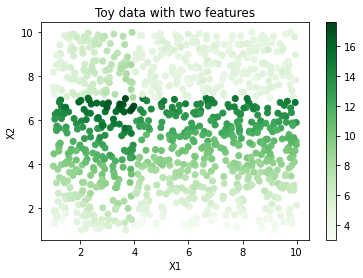

In [15]:
plt.scatter(X_train["X1"],X_train["X2"], c=y_train["y"],cmap='Greens')
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Toy data with two features")

## Tree functions


In [94]:
def find_best_rule(hist,features):
    
    #X_train with X, g and h for all samples
    
    best_feature, best_threshold, opt_split = None, None, np.inf
    
    for i in range(len(hist)):
        feat = features[i]
        df = hist[i]
        thresholds = df[feat].unique().tolist()
        thresholds.sort()
        thresholds = thresholds[1:]
        for t in thresholds:
            df_L =  df[df[feat]<t]
            df_R =  df[df[feat]>=t]
    
            G = np.sum(df["g"])
            H = np.sum(df["h"])
    
            G_L = np.sum(df_L["g"])
            G_R = np.sum(df_R["g"])
    
            H_L = np.sum(df_L["h"])
            H_R = np.sum(df_R["h"])
            
              
            if (H==0) or (H_R==0) or (H_L ==0):
                continue
        
            split = 1/2*((G_L*G_L)/H_L + (G_R*G_R)/H_R - (G*G)/H)
            
            opt_split = min(opt_split, split)
            
            if split == opt_split:
                x_opt = t
                best_feature = feat
    
    return {'feature': best_feature, 'threshold': x_opt}


def split(hist,feature, depth, max_depth):
    if depth == max_depth:
        w = []
        for i in range(len(hist)):
            w.append(-np.sum(hist[i]["g"])/np.sum(hist[i]["h"]))
        return {'prediction': np.mean(w)}
    
    #Find the best split
    rule = find_best_rule(hist, feature)
    feat = feature.index(rule["feature"])
    
    #Split on the rule
    left_hist = hist.copy()
    right_hist = hist.copy()
    
    left_ix = hist[feat][rule['feature']] < rule['threshold']
    
    left_hist[feat] = hist[feat][left_ix]
    right_hist[feat] = hist[feat][~left_ix]
    
    #Find best rule and split on subsamples
    rule['left'] = split(left_hist, feature, depth + 1, max_depth)
    rule['right'] = split(right_hist, feature, depth + 1, max_depth)
    return rule

def find_leaf_weights(df,tree):
    df["tag"] = df.apply(predict, axis='columns', rules=tree.copy())

    weights = df.groupby('tag')[['g','h']].sum()
    weights["w"] = -weights["g"]/weights["h"]

    df.drop('tag', axis = 1, inplace = True)
    weights.drop(["g","h"],axis = 1, inplace = True)

    paths = [["left","left"],["left","right"],["right","left"],["right","right"]]

    for i in paths: 
        target = tree[i[0]][i[1]]["prediction"]
        tree[i[0]][i[1]]["prediction"] = weights[weights.index == target]["w"].values[0]

    return tree

def find_leaf_weights_cl(clients,tree):
    
    weights = [None]*len(clients)
    
    for i in range(len(clients)):
        clients[i]["tag"] = clients[i].apply(predict, axis='columns', rules=tree.copy())

        weights[i] = clients[i].groupby('tag', as_index = False)[['g','h']].sum()
        weights[i]["w"] = -weights[i]["g"]/weights[i]["h"]

        clients[i].drop('tag', axis = 1, inplace = True)
        weights[i].drop(["g","h"],axis = 1, inplace = True)

    weight = weights[0]
    for i in range(1,len(weights)):
        weight.append(weights[i])
    
    weight = weight.groupby("tag")["w"].sum()
    paths = [["left","left"],["left","right"],["right","left"],["right","right"]]

    for i in paths: 
        target = tree[i[0]][i[1]]["prediction"]        
        
        if weight[weight.index == target].empty : 
            tree[i[0]][i[1]]["prediction"] = 0
        else :
            tree[i[0]][i[1]]["prediction"] = weight[weight.index == target].values[0]


    return tree


def predict(sample, rules):
    prediction = None
    while prediction is None:
        feature, threshold = rules['feature'], rules['threshold']
        if sample[feature] < threshold:
            rules = rules['left']
        else:
            rules = rules['right']
        prediction = rules.get('prediction', None)
    return prediction


In [4]:
def merge_hist(df,k,feat):
    m = len(df)
    if k>m:
        print("already satisfied")
        return df
    else:
        while k<m:
            df = df.sort_values(by=[feat])
            df.reset_index(inplace = True, drop = True)
            a = list(df[feat])
            b = [j-i for i, j in zip(a[:-1], a[1:])]

            mini = b.index(min(b))

            new = [(a[mini]+a[mini+1])/2,df["g"][mini]+df["g"][mini+1],df["h"][mini]+df["h"][mini+1]]

            df.loc[len(df)] = new
            df.drop([mini,mini+1], inplace = True)
            m = len(df)
        return df
